<a href="https://colab.research.google.com/github/umakantiiit/Transaction-Fraud-detection-using-XGBOOST-AND-RANDOM-FOREST/blob/main/Fraud_detection_random_forest_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Fraud.csv')

In [ ]:
df.head(6)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
value_counts = df['isFraud'].value_counts()

print(value_counts)

isFraud
0    6354407
1       8213
Name: count, dtype: int64


Severe imbalance in data, We can use undersampling,oversampling or SMOTE to avoid this or good class weight importance also can do the task.

Here , i am removing Step column as Fraud patterns can vary in timing, so it might not be a strong predictor.Along with that i am also removing nameOrig and nameDest column as these are customer identifiers and won't be useful for a generalized fraud detection model. we have to Focus on the behavior of the transactions, not the specific individuals.

In [ ]:
df.drop(['step', 'nameOrig', 'nameDest'], axis=1, inplace=True)

In [ ]:
df.head(5)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [ ]:
value_counts = df['isFlaggedFraud'].value_counts()

print(value_counts)

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64


In [ ]:
count = df[(df['isFlaggedFraud'] == 1) & (df['isFraud'] == 1)].shape[0]

print("Number of rows where both 'isFlaggedFraud' and 'isFraud' are 1:", count)

Number of rows where both 'isFlaggedFraud' and 'isFraud' are 1: 16


With this above code we can conclude that all the transaction where isflaggedtrue is 1 are fraud , so, this is a good indicator of fraud detection.

if we calculate the difference between newbalanceorig and oldbalanceorg ,that can be a good indicator to detect fraud beacuse if that value is too high then most likely that will be a fraud transaction.

In [ ]:
import pandas as pd


df_encoded = pd.get_dummies(df, columns=['type'], prefix='type')

print(df_encoded)


             amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           9839.64      170136.00       160296.36            0.00   
1           1864.28       21249.00        19384.72            0.00   
2            181.00         181.00            0.00            0.00   
3            181.00         181.00            0.00        21182.00   
4          11668.14       41554.00        29885.86            0.00   
...             ...            ...             ...             ...   
6362615   339682.13      339682.13            0.00            0.00   
6362616  6311409.28     6311409.28            0.00            0.00   
6362617  6311409.28     6311409.28            0.00        68488.84   
6362618   850002.52      850002.52            0.00            0.00   
6362619   850002.52      850002.52            0.00      6510099.11   

         newbalanceDest  isFraud  isFlaggedFraud  type_CASH_IN  type_CASH_OUT  \
0                  0.00        0               0         False          False 

i have used One hot encoding to convert the type column into numerical value

In [ ]:
df_encoded.head(5)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,False,False,False,True,False
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,False,False,False,True,False
2,181.00,181.0,0.00,0.0,0.0,1,0,False,False,False,False,True
3,181.00,181.0,0.00,21182.0,0.0,1,0,False,True,False,False,False
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,False,False,False,True,False


Now checking spearmann rank correlation coefficient and pearson corr coeffi. with isfraud column, as that is our target column .

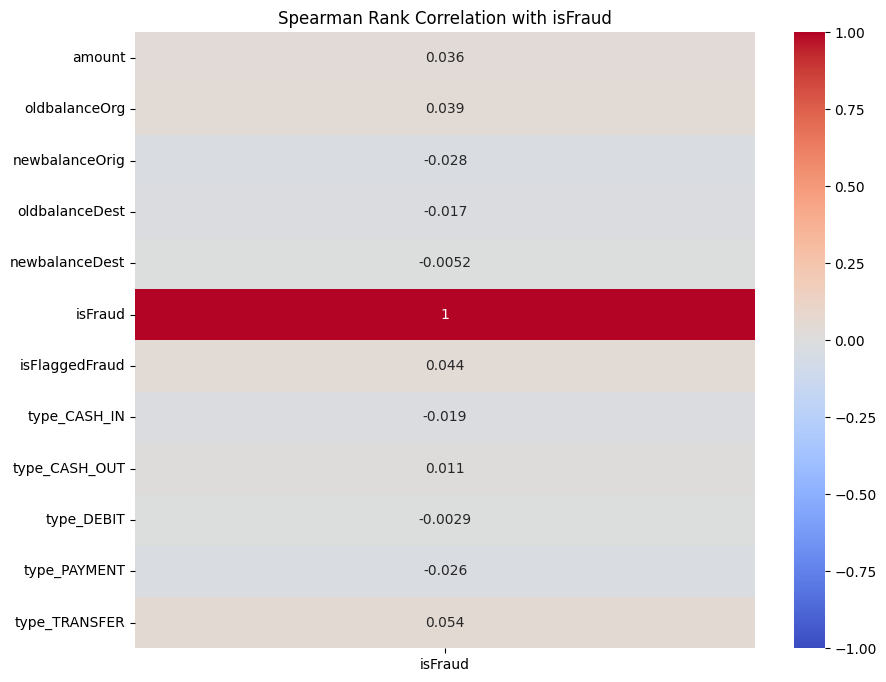

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


correlations = df_encoded.corr(method='spearman')['isFraud']


plt.figure(figsize=(10, 8))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Spearman Rank Correlation with isFraud')
plt.show()


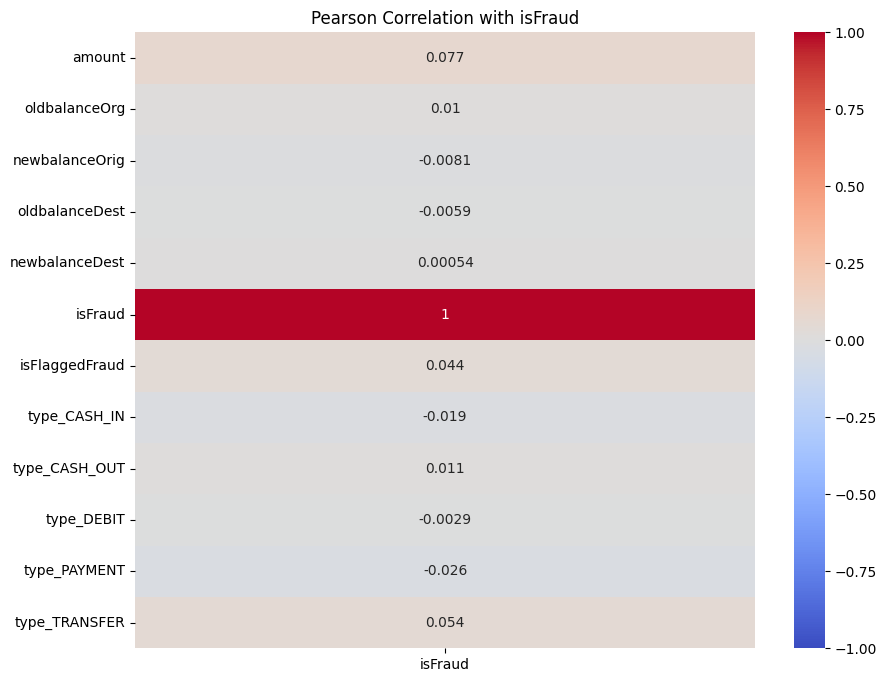

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


correlations = df_encoded.corr(method='pearson')['isFraud']


plt.figure(figsize=(10, 8))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation with isFraud')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop('isFraud', axis=1)
y = df_encoded['isFraud']

in the below cell , i am applying SMOTE with Random forest model as Random forest model is good with overfitting and handling outlier.

In [ ]:
import matplotlib.pyplot as plt
from statistics import mean
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
over_X, over_y = oversample.fit_resample(X, y)
over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.3, stratify=over_y)
SMOTE_SRF = RandomForestClassifier(n_estimators=30, random_state=0)

Here, i am using base learner as 30 beacuse if we take more than 30 , then the training time excedding more in CPU .i have used SMOTE for the class inbalance problem.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

SMOTE_SRF.fit(over_X_train, over_y_train)



RandomForestClassifier(n_estimators=30, random_state=0)

plotting the confusion matrix below for good interpretation.

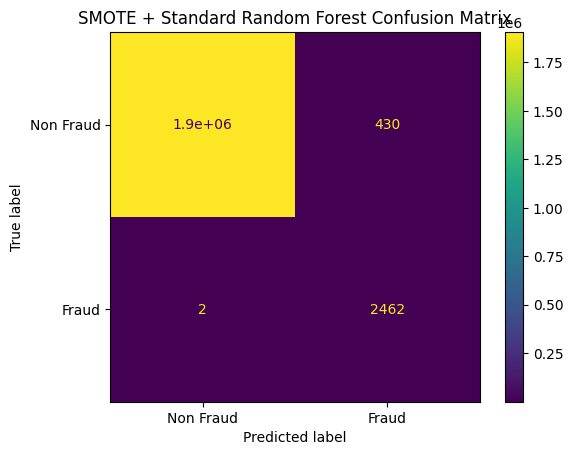

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



y_pred = SMOTE_SRF.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non Fraud', 'Fraud'])


disp.plot()
plt.title('SMOTE + Standard Random Forest Confusion Matrix')
plt.show()


Seems the model is performing well beacuse there are only 2 transaction which are actually Fraud but our model categorized that as Non- fraud.and 430 which are actually non-fraud but we classified that as fraud.So, in total 432 misclassification.This we can avoid if we increase base learner to 50, but we need computation power for that.

In [ ]:
from sklearn.metrics import classification_report
y_pred = SMOTE_SRF.predict(X_test)  # Predict labels using your trained model

# Calculate and print classification report
report = classification_report(y_test, y_pred, target_names=['Non Fraud', 'Fraud'])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

   Non Fraud       1.00      1.00      1.00   1906322
       Fraud       0.85      1.00      0.92      2464

    accuracy                           1.00   1908786
   macro avg       0.93      1.00      0.96   1908786
weighted avg       1.00      1.00      1.00   1908786

